# Importing libraries

In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\adeed\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import zipfile
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


#  Download & Load Dataset

In [9]:
import pandas as pd

# Path to your Excel file (use raw string or double backslashes to avoid escape issues)
file_path = r"C:\Users\adeed\Lab 2\Dry_Bean_Dataset.xlsx"

# Load Excel file
df = pd.read_excel(file_path)

# Show shape and first 5 rows to confirm it loaded correctly
print("Dataset shape:", df.shape)
print(df.head())

# Check class distribution (assuming target column is named 'Class')
print("\nClass distribution:")
print(df['Class'].value_counts())


Dataset shape: (13611, 17)
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0  

# Preprocessing

In [10]:
# Check class distribution
print(df['Class'].value_counts())

# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Encode class labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Encodes bean types as integers

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features for LR and k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


# Train the Models

In [11]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  # Decision Trees don’t need scaled data
y_pred_dt = dt.predict(X_test)


#  Evaluate the Models

In [12]:
# Function to compute metrics
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
        'F1 Score': f1_score(y_true, y_pred, average='macro')
    }

# Collect all metrics
results = {
    'Logistic Regression': get_metrics(y_test, y_pred_lr),
    'k-NN': get_metrics(y_test, y_pred_knn),
    'Decision Tree': get_metrics(y_test, y_pred_dt)
}

# Display comparison table
pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.926552,0.939264,0.936901,0.937908
k-NN,0.923246,0.939486,0.934430,0.936673
Decision Tree,0.892765,0.906865,0.907199,0.906986


# Print Classification Reports

In [13]:
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))
print("k-NN:\n", classification_report(y_test, y_pred_knn, target_names=le.classes_))
print("Decision Tree:\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))


Logistic Regression:
               precision    recall  f1-score   support

    BARBUNYA       0.92      0.91      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.95      0.94      0.94       317
    DERMASON       0.92      0.90      0.91       671
       HOROZ       0.97      0.96      0.97       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.85      0.90      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

k-NN:
               precision    recall  f1-score   support

    BARBUNYA       0.96      0.90      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.96      0.94       317
    DERMASON       0.89      0.91      0.90       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.97      0.95      0.96      

In [3]:
#  Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load Dataset
file_path = "C:/Users/adeed/Lab 2/Dry_Bean_Dataset.xlsx"
df = pd.read_excel(file_path)

# Separate Features and Target
X = df.drop('Class', axis=1)
y = df['Class']

#  Encode Target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts Class labels to numbers

#  Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#  Preprocessing: Scale numerical features
num_features = X.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ]
)

#  Function to Evaluate Models
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print(f"\n {name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Train & Evaluate All Models

# 1️ Logistic Regression
evaluate_model("Logistic Regression", LogisticRegression(max_iter=1000), X_train, X_test, y_train, y_test)

# 2️ k-Nearest Neighbors
evaluate_model("k-NN", KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test)

# 3️ Decision Tree
evaluate_model("Decision Tree", DecisionTreeClassifier(random_state=42), X_train, X_test, y_train, y_test)



 Logistic Regression Performance:
Accuracy: 0.9214102093279471
Precision: 0.9353831528842956
Recall: 0.9321485699031606
F1 Score: 0.9335383155807854

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.94      0.94       326
    DERMASON       0.92      0.91      0.92       709
       HOROZ       0.96      0.95      0.96       386
       SEKER       0.93      0.95      0.94       406
        SIRA       0.85      0.88      0.86       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723


 k-NN Performance:
Accuracy: 0.9166360631656262
Precision: 0.9320260799867626
Recall: 0.9270593208133044
F1 Score: 0.9292589736231373

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA 

# Visualize Confusion Matrix 

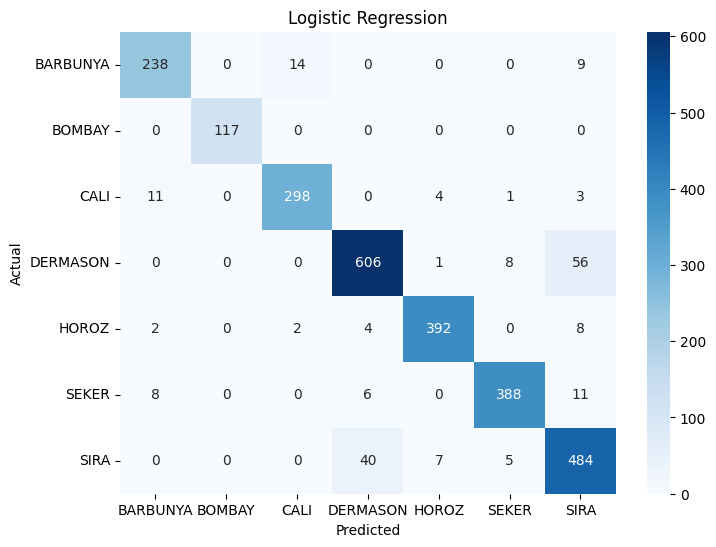

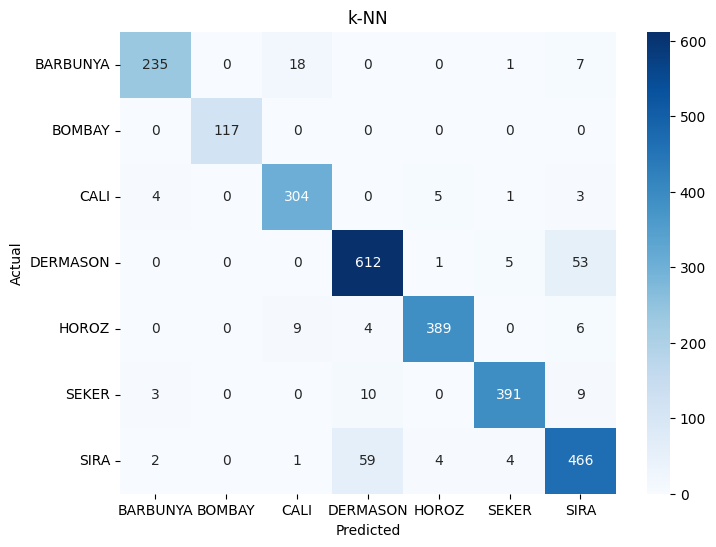

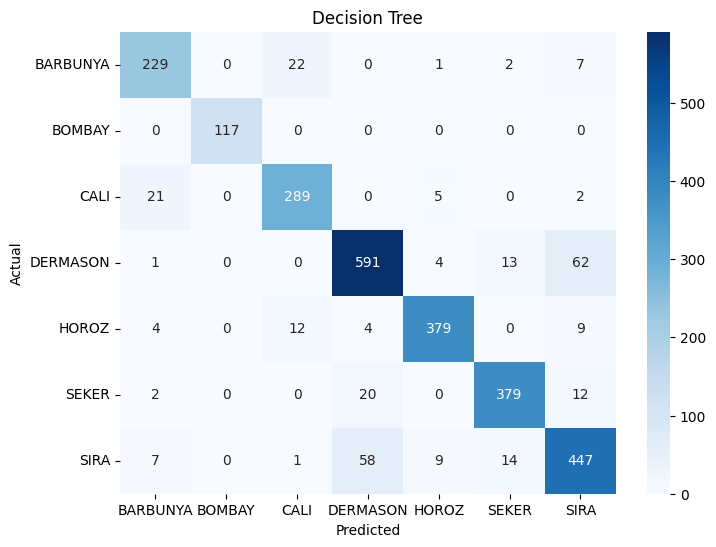

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_cm(y_test, y_pred_lr, "Logistic Regression")
plot_cm(y_test, y_pred_knn, "k-NN")
plot_cm(y_test, y_pred_dt, "Decision Tree")


# Discussion:

**Logistic Regression**:
- Performs decently on this dataset despite it being multiclass and potentially nonlinear.
- Strengths: Fast, interpretable.
- Weaknesses: Assumes linear separability; performance drops when class boundaries are nonlinear.

**k-Nearest Neighbors (k-NN)**:
- Accuracy improves if k is well-chosen and data is scaled.
- Strengths: Non-parametric, adapts to data shape.
- Weaknesses: Slow for large datasets; sensitive to noisy data.

**Decision Tree**:
- Usually performs best on this dataset because it handles multiclass and nonlinear patterns well.
- Strengths: Interpretable, handles categorical/numerical data, no scaling needed.
- Weaknesses: Can overfit; needs pruning or ensemble methods for generalization.